In [181]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Data

In [182]:
## Importing the necessary libraries and loading the dataset into a dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
amazon=pd.read_csv('ratings_Electronics.csv',names=['userID','productID','ratings','timestamp'],header=None)

In [183]:
## Visualizing the first few records in the dataset
amazon.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


In [184]:
## Removing the timestamp column as it would be of no use ini the analysis
amazon=amazon.drop('timestamp',axis=1)

In [185]:
amazon.head()

,userID,productID,ratings
0,AKM1MP6P0OYPR,132793040,5
1,A2CX7LUOHB2NDG,321732944,5
2,A2NWSAGRHCP8N5,439886341,1
3,A2WNBOD3WNDNKT,439886341,3
4,A1GI0U4ZRJA8WN,439886341,1


In [186]:
## Displaying the no of rows and columns in the dataset
amazon.shape
## There are nearly 10.5 lakhs records 

(1048576, 3)

In [187]:
amazon.info()
## Checking for the datatypes and any null or NA values being present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 3 columns):
userID       1048576 non-null object
productID    1048576 non-null object
ratings      1048576 non-null int64
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [188]:
amazon.describe()
## Since only one integer variable is present in the dataset, the descriptive statistics of ratings alone is displayed .
## From the table it is evident that standard deviation is in acceptable region of 1

,ratings
count,1.048576e+06
mean,3.973380e+00
std,1.399329e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [189]:
amazon["ratings"].unique()
print("Unique Users:",len(amazon["userID"].unique()))
print("Unique Products:",len(amazon["productID"].unique()))
print("Unique Ratings:",len(amazon["ratings"].unique()))
## Unique Values in each column of dataset are being identified

array([5, 1, 3, 2, 4], dtype=int64)

Unique Users: 786330
Unique Products: 61894
Unique Ratings: 5


In [261]:
amazon.userID.value_counts().head(50)

A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
AKT8TGIT6VVZ5     122
A11D1KHM7DVOQK    112
A2B7BUH8834Y6M    103
A3OXHLG6DIBRW8     95
A203OCQQ12MAVT     90
A2R6RA8FRBS608     88
A2AEZQ3DGBBLPR     85
A680RUE1FDO8B      78
A1F9Z42CFF9IAY     76
A1FR68QH6Z4YZM     75
AGHZXQL9F94T9      75
A1MJMYLRTZ76ZX     74
A1JWSDDIH5Z7DV     72
A7Y6AVS576M03      70
A1435P5AMCPB3X     69
A149RNR5RH19YY     68
A12DLJESJKM1OQ     65
AWPODHOB4GFWL      64
ABH9D1TEOJ56E      64
A2CL818RN52NWN     64
A2AY4YUOX2N1BQ     63
A2XRMQA6PJ5ZJ8     63
A1RPTVW5VEOSI      63
A38QEATH3NODFM     61
A1ODOGXEYECQQ8     60
AGXV8E7XK9J6H      59
AT2J7H5TRZM8Z      57
A1VQHH85U7PX0      57
A2BGZ52M908MJY     54
A3NCIN6TNL0MGA     54
A15QYHQH80W30L     54
ALUNVOQRXOZIA      53
A250AXLRBVYKB4     50
A11KZ906QD08C5     49
A1EKSETIBS9ETQ     49
A1KD8NJPZ01R37     48
A2PSD2R9A1CXG7     47
ARBKYIVNYWK3C      47
A1UEL5C1N6E5SE     47
AD0J5KK4WQXNS      47
A2JRDFIGWT

In [260]:
amazon.productID.value_counts().head(10)

B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
B000BKJZ9Q    3219
B000B9RI14    2996
B000A6PPOK    2828
B00007M1TZ    2608
B00004ZCJE    2547
Name: productID, dtype: int64

(array([128251.,      0.,  62644.,      0.,      0.,  83509.,      0.,
        208535.,      0., 565637.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

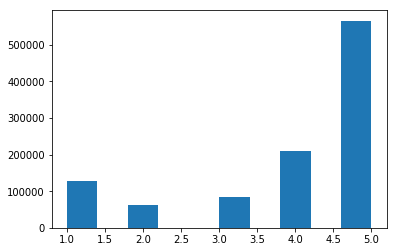

In [192]:
plt.hist(amazon["ratings"])

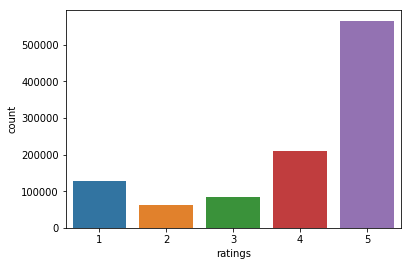

In [193]:
sns.countplot(x='ratings',data=amazon)

From the histogram and countplot it is evident that ratings 5 has highest number of user review and ratings 2 has the least number of user reviews. 

# Popularity based Model

# Using the whole dataset to find the top 5 products based on the maximum ratings they have got

In [194]:
## Grouping by productID and find the mean of the ratings
amazon_popular=pd.DataFrame(amazon.groupby(['productID'])['ratings'].mean())

In [195]:
## Storing the data related to how many times a product is being rated.
amazon_popular['rating_counts']=pd.DataFrame(amazon.groupby(['productID'])['ratings'].count())

In [196]:
## Sorting as per rating counts in descending order to find the top 5 most popular products based on ratings.
amazon_popular.sort_values('rating_counts',ascending=False).head(5)

,ratings,rating_counts
productID,,
B0002L5R78,4.448614,9487
B0001FTVEK,4.007109,5345
B000I68BD4,3.501530,4903
B000BQ7GW8,4.553216,4275
B00007E7JU,4.565995,3523


# Creating a subset of the dataset based on user and product ratings > 50

To avoid memory issues,Subsetting the overall dataset based on ratings which are above 50 for user and product

In [197]:
amazon_user = amazon['userID'].value_counts() >50
amazon_user = amazon_user[amazon_user].index.tolist()

In [198]:
amazon_pdct = amazon['productID'].value_counts() >50
amazon_pdct = amazon_pdct[amazon_pdct].index.tolist()

In [199]:
ratings=amazon[(amazon['userID'].isin(amazon_user)) & (amazon['productID'].isin(amazon_pdct))]

In [200]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 2162 to 1048158
Data columns (total 3 columns):
userID       1294 non-null object
productID    1294 non-null object
ratings      1294 non-null int64
dtypes: int64(1), object(2)
memory usage: 40.4+ KB


In [201]:
print("Unique Users:",len(ratings["userID"].unique()))
print("Unique Products:",len(ratings["productID"].unique()))
print("Unique Ratings:",len(ratings["ratings"].unique()))

Unique Users: 37
Unique Products: 955
Unique Ratings: 5


In [202]:
ratings.head()

,userID,productID,ratings
2162,A5JLAU2ARJ0BO,1400532655,1
3050,ALUNVOQRXOZIA,1400599997,1
7748,A680RUE1FDO8B,B000001OMI,5
8350,A3NCIN6TNL0MGA,B00000DM9W,5
8732,A6FIAB28IS79,B00000J05A,3


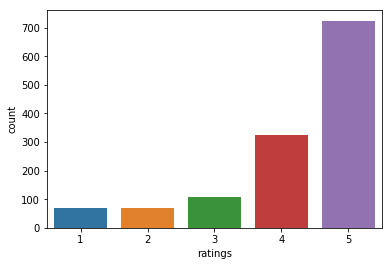

In [203]:
sns.countplot(x='ratings',data=ratings)

From the countplot it is evident that ratings 5 has highest number of user review and ratings 1 & 2 has the least number of user reviews. 

In [204]:
ratings.productID.value_counts().head(10)

B00004SB92    7
B0009RKL5S    5
B00004ZCJE    5
B000BKJZ9Q    5
B00008OE6I    5
B00007KDVI    5
B000BY52NK    4
B00008OE5G    4
B0007QKMQY    4
B00007EDM8    4
Name: productID, dtype: int64

# Popularity based model on subset of original dataset where dataset has data related to users ratings more than 50 using Group by on Products 

In [205]:
## Grouping by productID and find the mean of the ratings
amazon_sub_popular=pd.DataFrame(ratings.groupby(['productID'])['ratings'].mean())

In [206]:
## Storing the data related to how many times a product is being rated.
amazon_sub_popular['ratings_count']=pd.DataFrame(ratings.groupby(['productID'])['ratings'].count())

In [207]:
## Sorting as per rating counts in descending order to find the top 5 most popular products based on ratings.
amazon_sub_popular.sort_values('ratings_count',ascending=False).head(5)

,ratings,ratings_count
productID,,
B00004SB92,4.0,7
B00007KDVI,3.0,5
B000BKJZ9Q,4.2,5
B00004ZCJE,4.6,5
B00008OE6I,4.6,5


# Transforming Data To surprise format

In [208]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [209]:
data = Dataset.load_from_df(ratings[['userID', 'productID', 'ratings']], reader)

In [210]:
data

In [211]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30,random_state=100)

In [212]:
type(trainset)

surprise.trainset.Trainset

# Training the model

In [213]:
from surprise import KNNWithMeans
from surprise import accuracy

In [214]:
amaz = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
amaz.fit(trainset)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


# Evaluating Model Performance

In [215]:
len(testset)
print("Type:",type(testset))

389

Type: <class 'list'>


In [216]:
testset[0:5]

[('A3OXHLG6DIBRW8', 'B0009PAYY8', 5.0),
 ('ABH9D1TEOJ56E', 'B00008PVXA', 3.0),
 ('AT2J7H5TRZM8Z', 'B0000645C8', 5.0),
 ('A231WM2Z2JL0U3', 'B00004XO1V', 5.0),
 ('A6FIAB28IS79', 'B00067OF80', 5.0)]

In [217]:
test_pred = amaz.test(testset)

In [218]:
len(test_pred)

389

In [219]:
test_pred[0]

Prediction(uid='A3OXHLG6DIBRW8', iid='B0009PAYY8', r_ui=5.0, est=4.235359116022099, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [220]:
accuracy.rmse(test_pred)

RMSE: 1.2850


1.2849629715471567

# SVD MODEL

In [243]:
from surprise import SVD
svd_model = SVD(n_factors=40,biased=False)
svd_model.fit(trainset)

In [245]:
test_pred1 = svd_model.test(testset)

In [246]:
accuracy.rmse(test_pred1)

RMSE: 2.1383


2.1383068121487656

# Parameter tuning the SVD Model using Gridsearch

In [247]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15,20,25,30,35,40,45,50], "reg_all":[0.01,0.02,0.03,0.04,0.05]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [248]:
gs.fit(data)

In [249]:
gs.best_params

{'rmse': {'n_factors': 40, 'reg_all': 0.02}}

In [250]:
accuracy.rmse(gs.test(testset))

RMSE: 0.8373


0.837260903431201

From the above three models KNNwithmeans, SVD, Parameter tuned SVD.
Parameter tuned SVD Model is found to have a better and lower RMSE value.

So this model is being used to find the top recommendations for each user.

# Generating top n recommendations


In [251]:
## Building a anti_testset using trainset
testset_new = trainset.build_anti_testset()

In [252]:
len(testset_new)

25772

In [253]:
testset_new[0:5]

[('A231WM2Z2JL0U3', 'B0007Y79B2', 4.235359116022099),
 ('A231WM2Z2JL0U3', 'B000026D8E', 4.235359116022099),
 ('A231WM2Z2JL0U3', 'B000233YDK', 4.235359116022099),
 ('A231WM2Z2JL0U3', 'B0002SQ2P2', 4.235359116022099),
 ('A231WM2Z2JL0U3', 'B0009HN57E', 4.235359116022099)]

In [254]:
## Making predictions usinf Parameter tuned SVD Model.
predictions = gs.test(testset_new)

In [255]:
## Creating a dataframe and storing user id, item id and estimated ratings 
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [256]:
predictions_df.columns = ["userId","iid","est_rating"]
predictions_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [257]:
predictions_df.head()

,userId,iid,est_rating
4058,AWPODHOB4GFWL,B0007QKMQY,4.587989
4498,AWPODHOB4GFWL,B00005LENO,4.568055
4096,AWPODHOB4GFWL,B000EXRSVM,4.561234
4416,AWPODHOB4GFWL,B000G1D8HU,4.551572
4441,AWPODHOB4GFWL,B0000645C8,4.541817


In [258]:
## from predictions dataframe creating a groupby userID and storing top 5 recommended products for each user
top_5_recos = predictions_df.groupby("userId").head(5).reset_index(drop=True)

In [262]:
top_5_recos

,userId,iid,est_rating
0,AWPODHOB4GFWL,B0007QKMQY,4.587989
1,AWPODHOB4GFWL,B00005LENO,4.568055
2,AWPODHOB4GFWL,B000EXRSVM,4.561234
3,AWPODHOB4GFWL,B000G1D8HU,4.551572
4,AWPODHOB4GFWL,B0000645C8,4.541817
5,AT6CZDCP4TRGA,B0007QKMQY,3.400502
6,AT6CZDCP4TRGA,B0009S5HQA,3.386263
7,AT6CZDCP4TRGA,B0000DIFGJ,3.363973
8,AT6CZDCP4TRGA,B00006B7HB,3.361113
9,AT6CZDCP4TRGA,B00005YXZE,3.360137


Amazon Electronics Dataset is so dense dataset with a huge number of records.

In order to avoid memory issues, subsetting of data is done based on certain characteristics such as considering ratings more than 50.

From the EDA, it is found that Ratings 5 is found to have lot number of records and ratings 1 & 2 are having least.

This implies products in the dataset are found to be the most prominent and popular products.

From the popularity based recommender model, top 5 products based on maximum number of ratings are being displayed.

Collaborative filtering recommendation model is build using pearson baseline, SVD, Parameter tuned SVD models.

From the 3 models, SVD Tuned model has a lower and better RMSE value.

Using this, top 5 recommendations for each user is being predicted and displayed.